<a href="https://colab.research.google.com/github/agustinsilva447/Fisica-de-los-Semiconductores/blob/main/1_synumses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install synumses-pkg-pabele

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import synumses.one_dimension.solver as solver
import synumses.one_dimension.parameters as parameters
from synumses.one_dimension.functions import calc_p_density, calc_n_density
from synumses.one_dimension.scharfetter_gummel_bernoulli import bernoulli, jacobian, update_b, first_jacobian, first_update_b, hole_current_density, electron_current_density

Por defecto, todos los parámetros están seteados a los valores de Silicio.

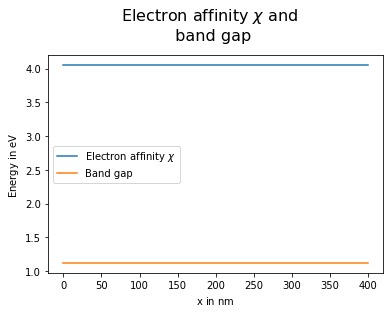

In [ ]:
# Plot electron affinity  and \n band gap

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Electron affinity $\chi$ and \n band gap", y= 1.05, fontsize=16)
axis.plot(parameters.pos_x * 1E9, parameters.Chi, label='Electron affinity $\chi$')
axis.plot(parameters.pos_x * 1E9, parameters.Eg, label='Band gap')
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")
axis.legend(loc = 6)
plt.show()

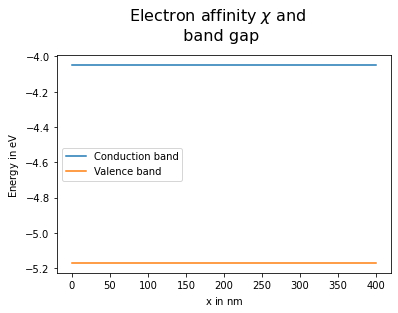

In [ ]:
# Plot band diagram

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Electron affinity $\chi$ and \n band gap", y= 1.05, fontsize=16)
axis.plot(parameters.pos_x * 1E9, -parameters.Chi, label='Conduction band')
axis.plot(parameters.pos_x * 1E9, -parameters.Eg - parameters.Chi, label='Valence band')
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")
axis.legend(loc = 6)
plt.show()

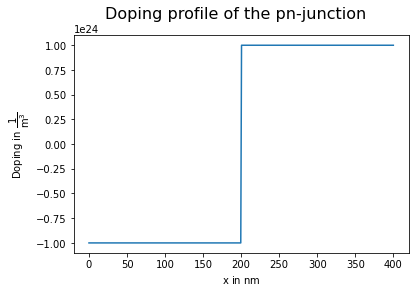

In [ ]:
# Plot doping profile of the pn-junction

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Doping profile of the pn-junction", fontsize=16)
axis.plot(parameters.pos_x * 1E9, parameters.C, label='Doping')
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Doping in $\mathrm{\dfrac{1}{m^3}}$")
plt.show()

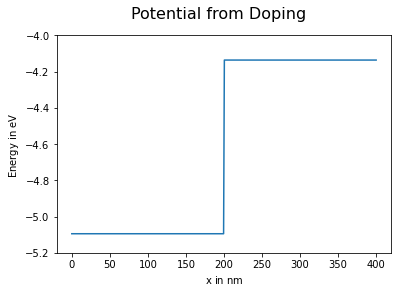

In [ ]:
solver.solve_from_doping()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential from Doping", fontsize=16)
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")
axis.plot(parameters.pos_x * 1E9, parameters.u[0::3])
plt.ylim(-5.2, -4.0)
plt.savefig("Potential_from_Doing.png")
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


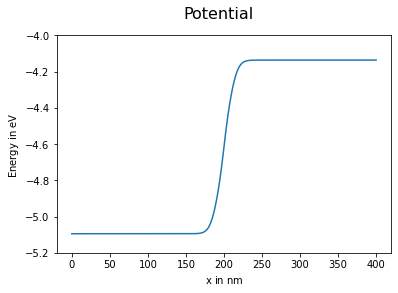

In [ ]:
solver.solve_no_bias()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential", fontsize=16)
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")
axis.plot(parameters.pos_x * 1E9, parameters.u[0::3])
plt.ylim(-5.2, -4.0)
plt.savefig("Potential_00.png")
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


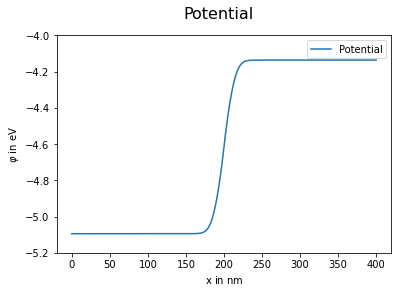

In [ ]:
solver.solve_bias(0,0)

# Plot potential

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential", fontsize=16)
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"$\varphi$ in $\mathrm{eV}$")
axis.plot(parameters.pos_x * 1E9, parameters.u[0::3], label='Potential')
axis.legend()
plt.ylim(-5.2, -4.0)
plt.savefig("Potential_bias.png")
plt.show()

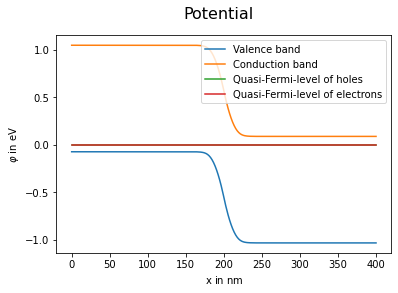

In [ ]:
# Plot band diagram

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential", fontsize=16)
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"$\varphi$ in $\mathrm{eV}$")
axis.plot(parameters.pos_x * 1E9, -parameters.u[0::3] - parameters.Chi -  parameters.Eg, label='Valence band')
axis.plot(parameters.pos_x * 1E9, -parameters.u[0::3] - parameters.Chi                 , label='Conduction band')
axis.plot(parameters.pos_x * 1E9, -parameters.u[1::3]                                  , label='Quasi-Fermi-level of holes')
axis.plot(parameters.pos_x * 1E9, -parameters.u[2::3]                                  , label='Quasi-Fermi-level of electrons')
axis.legend()
plt.show()

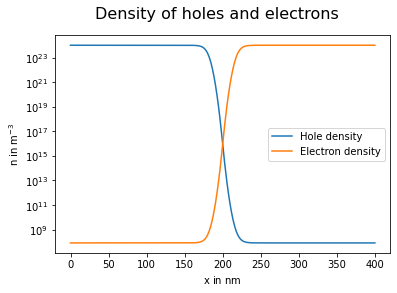

In [ ]:
# Plot electron and hole density

p = calc_p_density()
n = calc_n_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Density of holes and electrons", fontsize=16)
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"n in $\mathrm{m^{-3}}$")
axis.semilogy(parameters.pos_x * 1E9, p, label='Hole density')
axis.semilogy(parameters.pos_x * 1E9, n, label='Electron density')
axis.legend()
plt.show()

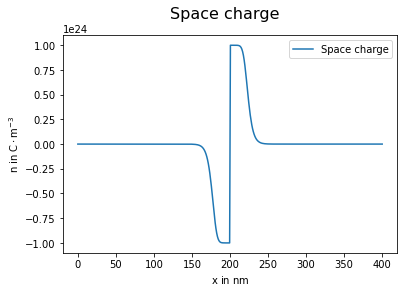

In [ ]:
# Plot space charge

p = calc_p_density()
n = calc_n_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Space charge", fontsize=16)
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"n in $\mathrm{C \cdot m^{-3}}$")
axis.plot(parameters.pos_x * 1E9, p-n+parameters.C, label='Space charge')
axis.legend()
plt.show()

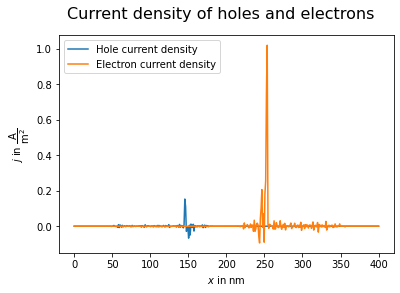

In [ ]:
# Plot electron and hole current density 

j_p =     hole_current_density()
j_n = electron_current_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Current density of holes and electrons", fontsize=16)
plt.xlabel(r"$x$ in $\mathrm{nm}$")
plt.ylabel(r"$j$ in $\mathrm{\dfrac{A}{m^{2}}}$")
axis.plot(parameters.pos_x * 1E9, j_p, label='Hole current density')
axis.plot(parameters.pos_x * 1E9, j_n, label='Electron current density')
axis.legend()
plt.show()

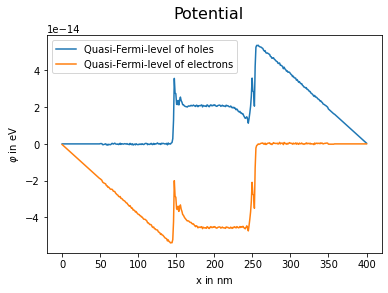

In [ ]:
# Plot band diagram

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential", fontsize=16)
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"$\varphi$ in $\mathrm{eV}$")
axis.plot(parameters.pos_x * 1E9, -parameters.u[1::3]                                  , label='Quasi-Fermi-level of holes')
axis.plot(parameters.pos_x * 1E9, -parameters.u[2::3]                                  , label='Quasi-Fermi-level of electrons')
axis.legend()
plt.show()

In [ ]:
u_start = 0.0
u_stop  = 0.7
u_step  = 0.025
voltage = []
current_density = []
bias_points = np.linspace(u_start, u_stop, int((u_stop-u_start)/(u_step))+2)
print(bias_points)
for bias_point in bias_points:
    solver.solve_bias(bias_point,0)   
    j = np.mean(hole_current_density() + electron_current_density())
    voltage.append(bias_point)
    current_density.append(j)
    print(bias_point, ",", j)

[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7  ]


/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


0.0 , -0.005642082887989125
0.024999999999999998 , 5.28781101239114e-05
0.049999999999999996 , 0.0022230184224019296
0.075 , -0.00463092358949992
0.09999999999999999 , -9.856441389861636e-05
0.12499999999999999 , -0.002929440157358294
0.15 , -0.00043110648423747006
0.175 , -0.0003704888733918568
0.19999999999999998 , 0.0044790987858251965
0.22499999999999998 , 0.002869329768109818
0.24999999999999997 , 0.003564963507109543
0.27499999999999997 , 0.014479039276987415
0.3 , 0.034388031453782913
0.32499999999999996 , 0.09978649993955434
0.35 , 0.2568025588166724
0.37499999999999994 , 0.6746833799702592
0.39999999999999997 , 1.77806848448712
0.425 , 4.655453759922258
0.44999999999999996 , 12.205267600417022
0.475 , 31.99005422094866
0.49999999999999994 , 83.83664768827961
0.5249999999999999 , 219.71284157750407
0.5499999999999999 , 575.7699138556978
0.575 , 1508.6546294048808
0.6 , 3952.6457444097305
0.625 , 10354.667192967565
0.6499999999999999 , 27122.13423736189
0.6749999999999999 , 7102

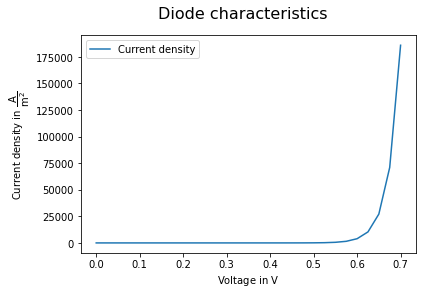

In [ ]:
# Diode charactersistics

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Diode characteristics", fontsize=16)
axis.plot(voltage, current_density, label='Current density')
axis.set_xlabel(r"Voltage in $\mathrm{V}$")
axis.set_ylabel(r"Current density in $\mathrm{\dfrac{A}{m^2}}$")
axis.legend()
#plt.ylim(-1E-6,1E-6)
plt.show()

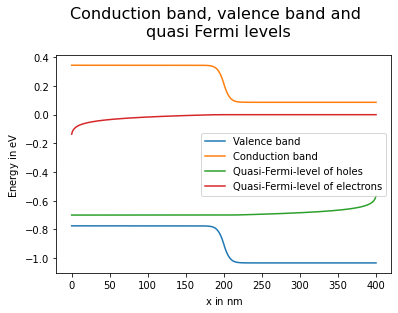

In [ ]:
# Plot potential and quasi-Fermi-levels

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Conduction band, valence band and \nquasi Fermi levels", y= 1.05, fontsize=16)
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")
axis.plot(parameters.pos_x * 1E9, -parameters.u[0::3] - parameters.Chi -  parameters.Eg, label='Valence band')
axis.plot(parameters.pos_x * 1E9, -parameters.u[0::3] - parameters.Chi                 , label='Conduction band')
axis.plot(parameters.pos_x * 1E9, -parameters.u[1::3]                                  , label='Quasi-Fermi-level of holes')
axis.plot(parameters.pos_x * 1E9, -parameters.u[2::3]                                  , label='Quasi-Fermi-level of electrons')
plt.legend()
plt.show()

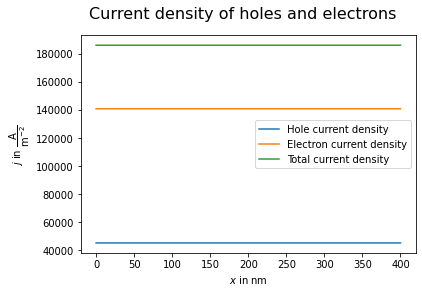

In [ ]:
# Plot electron and hole current density 

j_p =     hole_current_density()
j_n = electron_current_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Current density of holes and electrons", fontsize=16)
plt.xlabel(r"$x$ in $\mathrm{nm}$")
plt.ylabel(r"$j$ in $\mathrm{\dfrac{A}{m^{-2}}}$")
axis.plot(parameters.pos_x * 1E9, j_p, label='Hole current density')
axis.plot(parameters.pos_x * 1E9, j_n, label='Electron current density')
axis.plot(parameters.pos_x * 1E9, j_n+j_p, label='Total current density')
axis.legend()
plt.show()

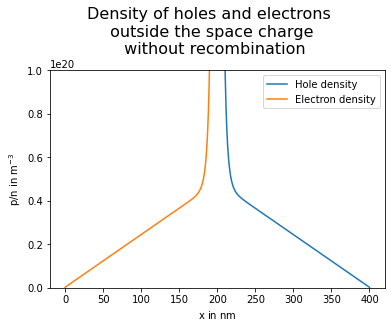

In [ ]:
# Electron and hole density outside the space cahreg

p = calc_p_density()
n = calc_n_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Density of holes and electrons \n outside the space charge \n without recombination",  y=1.10, fontsize=16)
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"p/n in $\mathrm{m^{-3}}$")
#axis.semilogy(p, label='Hole density')
axis.plot(parameters.pos_x * 1E9, p, label='Hole density')
#axis.semilogy(n, label='Electron density')
axis.plot(parameters.pos_x * 1E9, n, label='Electron density')
axis.legend()
plt.ylim(0, 1E20)
plt.show()

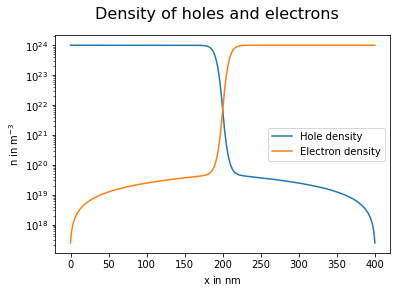

In [ ]:
# Plot electron and hole density

p = calc_p_density()
n = calc_n_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Density of holes and electrons", fontsize=16)
plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"n in $\mathrm{m^{-3}}$")
axis.semilogy(parameters.pos_x * 1E9, p, label='Hole density')
axis.semilogy(parameters.pos_x * 1E9, n, label='Electron density')
axis.legend()
plt.show()